In [1]:
import tkinter as tk
from tkinter import ttk 
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import pandas as pd
from pandas import read_csv
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

nietgelukt


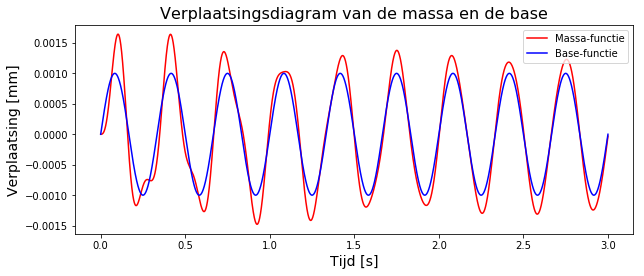

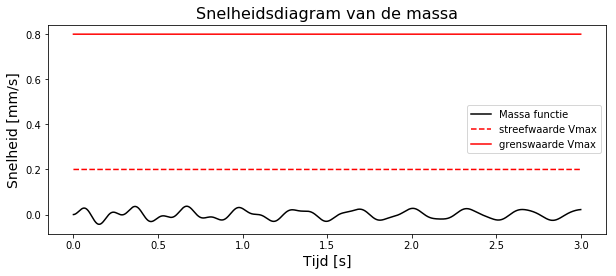

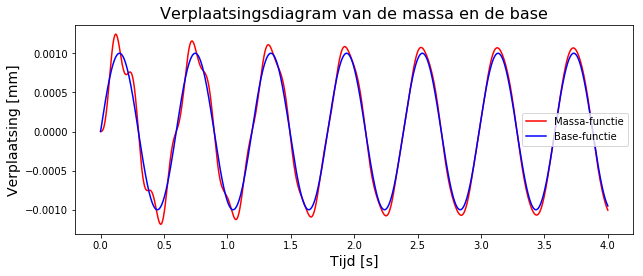

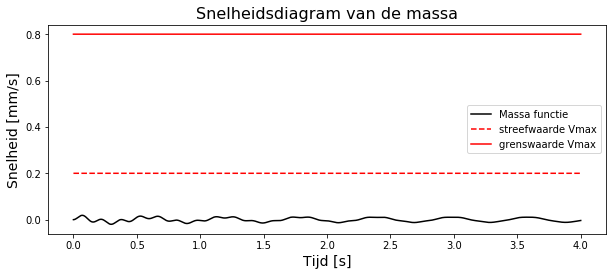

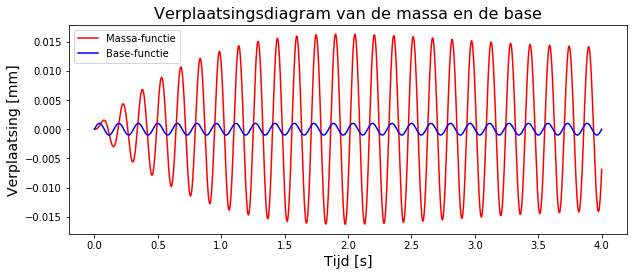

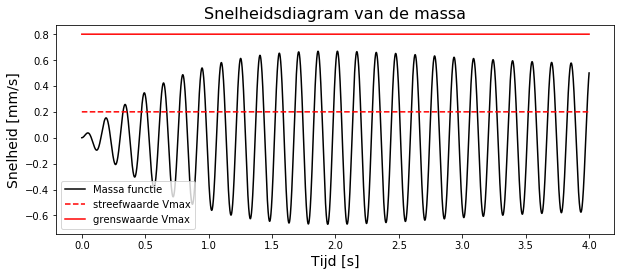

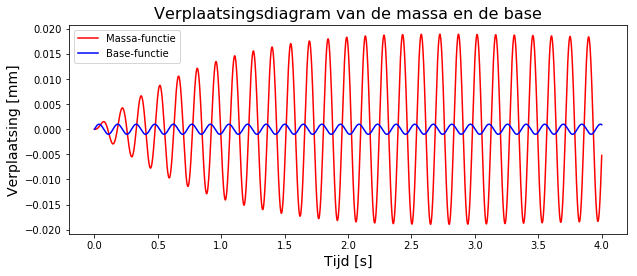

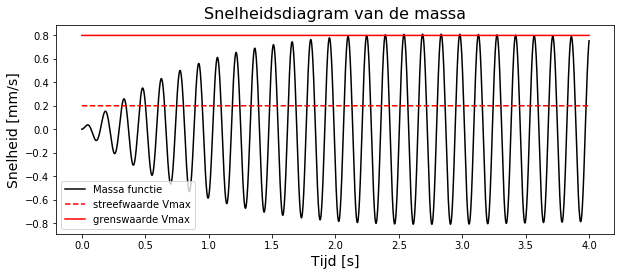

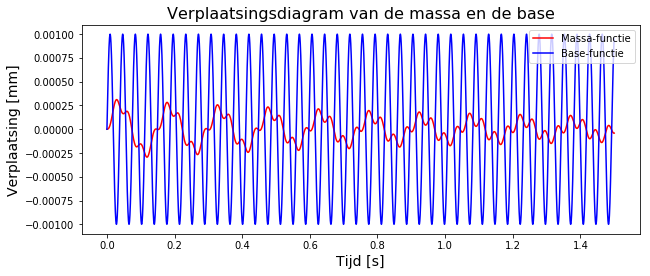

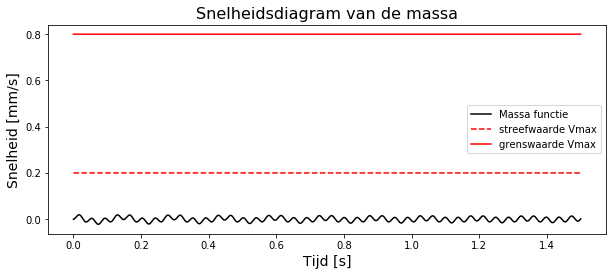

In [8]:
window= tk.Tk()
tabControl = ttk.Notebook(window)
tab1 = ttk.Frame(tabControl)
tab2 = ttk.Frame(tabControl)
tabControl.add(tab1, text='Input')
tabControl.add(tab2, text='Output')
tabControl.pack(expand=1, fill="both")
#maak grid
x1,x2,x3,xshift,xresultaat = 10,180,310,350,60

def xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1):
    m = Qtotaal*L1*0.5*1000/9.81 
    k = 38.4*Emodulus1*I1/(1000*L1**3)
    wn = np.sqrt(k/m) 
    t = np.linspace(0,teind1,100000)
    r = w1/wn
    theta1 = np.arctan((2*zeta1*r)/(1-(r**2)))
    if theta1 < 0.0*np.pi:
        theta1 = theta1 + np.pi
    xpart1 = ((wn**2*Y1)/(np.sqrt((wn**2-w1**2)**2+(2*zeta1*w1*wn)**2)))*np.sin(w1*t-theta1)
    xpart2 = ((2*zeta1*wn*w1*Y1)/(np.sqrt((wn**2-w1**2)**2+(2*zeta1*w1*wn)**2)))*np.cos(w1*t-theta1)
    xpart = xpart1 + xpart2
    v0 = 0 #begincodities
    x0 = 0
    w2 = wn*np.sqrt(1-zeta1**2)
    Fcos = 2*zeta1*wn*w1*Y1
    Fsin = wn**2*Y1
    w2 = wn*np.sqrt(1-zeta1**2)
    As = (-2*zeta1*wn*w1*Fsin)/(((wn**2-w1**2)**2+(2*zeta1*w1*wn)**2))
    Bs = (((wn**2-w1**2))*Fsin)/(((wn**2-w1**2)**2+(2*zeta1*w1*wn)**2))
    Ac = (((wn**2-w1**2))*Fcos)/(((wn**2-w1**2)**2+(2*zeta1*w1*wn)**2))
    Bc = (2*zeta1*wn*w1*Fcos)/(((wn**2-w1**2)**2+(2*zeta1*w1*wn)**2))
    A = -(zeta1*wn*Ac+zeta1*wn*As+Bc*w1+Bs*w1-zeta1*wn*x0-v0)/w2
    B = -As-Ac+x0
    xhom = (np.exp(-zeta1*wn*t))*(B*np.cos(w2*t)+A*np.sin(w2*t))
    xtot =  xpart + xhom
    vpart = np.zeros((len(t),1))
    for i in range(len(t)-1):
        vpart[i] = (xtot[i+1]-xtot[i])/(t[i+1]-t[i])
    result = np.max(abs(vpart))
    H = np.sqrt((1+(2*r*zeta1)**2)/(((1-r**2)**2)+(2*zeta1*r)**2))
    return result,k,m,wn,xtot,t,vpart,r,H

def result():
    try:
        #definieren variabelen
        Emodulus1 = float(Emodulus.get())
        L1 = float(Lengte.get())
        Qrust1 = float(Qrust.get())
        Qvariabel1 = float(Qvariabel.get())
        zeta1 = float(zeta.get())
        teind1 = float(teind.get())
        try:
            I1 = float(I.get())
            Qeigen1 = float(Qeigen.get())
        except:
            b1 = float(b.get())
            h1 = float(h.get())
            Qeigenm2 = float(Qeigen.get())
            I1 = (1/12)*b1*h1**3
            Qeigen1 = Qeigenm2*(b1/1000)
        Qtotaal = Qeigen1 + Qrust1 + Qvariabel1
        Y1 = float(Y.get())
        w1 = float(w.get())*2*np.pi
        #vaststellen maximale waarde volgens sbr richtlijn
        tijdstipkeuze1 = tijdstipkeuze.get()
        gebouwfunctie1 = gebouwfunctie.get()
        situatiekeuze1 = situatiekeuze.get()
        if gebouwfunctie1 == 'wonen'  and tijdstipkeuze1 == 'dag en avond' and situatiekeuze1== 'bestaande':
            a1 = 0.2
            a2 = 0.8
            a3 = 0.1
        if gebouwfunctie1 == 'kantoor'  and tijdstipkeuze1 == 'dag en avond' and situatiekeuze1== 'bestaande':
            a1 = 0.3
            a2 = 1.2
            a3 = 0.15
        if gebouwfunctie1 == 'werkruimte'  and tijdstipkeuze1 == 'dag en avond' and situatiekeuze1== 'bestaande':
            a1 = 0.1
            a2 = 0.1
            a3 = 0
        if gebouwfunctie1 == 'wonen'  and tijdstipkeuze1 == 'nacht' and situatiekeuze1== 'bestaande':
            a1 = 0.2
            a2 = 0.4
            a3 = 0.1
        if gebouwfunctie1 == 'kantoor'  and tijdstipkeuze1 == 'nacht' and situatiekeuze1== 'bestaande':
            a1 = 0.3
            a2 = 1.2
            a3 = 0.15
        if gebouwfunctie1 == 'werkruimte'  and tijdstipkeuze1 == 'nacht' and situatiekeuze1== 'bestaande':
            a1 = 0.1
            a2 = 0.1
            a3 = 0
        if gebouwfunctie1 == 'wonen'  and tijdstipkeuze1 == 'dag en avond' and situatiekeuze1== 'nieuw':
            a1 = 0.1
            a2 = 0.4
            a3 = 0
        if gebouwfunctie1 == 'kantoor'  and tijdstipkeuze1 == 'dag en avond' and situatiekeuze1== 'nieuw':
            a1 = 0.15
            a2 = 0.6
            a3 = 0
        if gebouwfunctie1 == 'werkruimte'  and tijdstipkeuze1 == 'dag en avond' and situatiekeuze1== 'nieuw':
            a1 = 0.1
            a2 = 0.1
            a3 = 0
        if gebouwfunctie1 == 'wonen'  and tijdstipkeuze1 == 'nacht' and situatiekeuze1== 'nieuw':
            a1 = 0.1
            a2 = 0.2
            a3 = 0
        if gebouwfunctie1 == 'kantoor'  and tijdstipkeuze1 == 'nacht' and situatiekeuze1== 'nieuw':
            a1 = 0.15
            a2 = 0.6
            a3 = 0
        if gebouwfunctie1 == 'werkruimte'  and tijdstipkeuze1 == 'nacht' and situatiekeuze1== 'nieuw':
            a1 = 0.1
            a2 = 0.1
            a3 = 0
        global labelresult,labelresultk,labelresultm, labelresultwn,labelresultr,labelresulta1,labelresulta2,labelresulta3
        try:
            labelresult.place_forget()
            labelresultk.place_forget()
            labelresultm.place_forget()
            labelresultwn.place_forget()
            labelresultr.place_forget()
            labelresulta1.place_forget()
            labelresulta2.place_forget()
            labelresulta3.place_forget()
        except:
            pass
        result1 = round(xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[0],3)
        resultk = round(xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[1],3)
        resultm = round(xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[2],3)
        resultwn = round(xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[3]/(2*np.pi),3)
        resultr = round(xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[7],3)
        resultt = teind1/100000
        resultH = round(xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[8],3)
        #tonen van variabele op het scherm
        #print k naar scherm
        labelresultk = tk.Label(tab2,text=str(resultk))
        labelresultk.place(x=x2+xresultaat,y=60)
        labelresultk2.pack()
        labelresultk2.place(x=x1,y=60)
        labelresultk3.pack()
        labelresultk3.place(x=x3,y=60)
        #print eindresultaat
        labelresult = tk.Label(tab2,text=str(result1))
        labelresult.place(x=x2+xresultaat,y=20)
        labelresult2.pack()
        labelresult2.place(x=x1,y=20)
        labelresult3.pack()
        labelresult3.place(x=x3,y=20)
        #Verwijder fout
        labelresultfout.place_forget()
        #print modale massa
        labelresultm = tk.Label(tab2,text=str(resultm))
        labelresultm.place(x=x2+xresultaat,y=80)
        labelresultm2.pack()
        labelresultm2.place(x=x1,y=80)
        labelresultm3.pack()
        labelresultm3.place(x=x3,y=80)
        #print natuurlijke frequentie
        labelresultwn = tk.Label(tab2,text=str(resultwn))
        labelresultwn.place(x=x2+xresultaat,y=100)
        labelresultwn2.pack()
        labelresultwn2.place(x=x1,y=100)
        labelresultwn3.pack()
        labelresultwn3.place(x=x3,y=100)
        #print frequentieratio
        labelresultr = tk.Label(tab2,text=str(resultr))
        labelresultr.place(x=x2+xresultaat,y=120)
        labelresultr2.pack()
        labelresultr2.place(x=x1,y=120)
        labelresultr3.pack()
        labelresultr3.place(x=x3,y=120)
        #print sbr eisen a1,a2,a3
        labelresulta1 = tk.Label(tab2,text=str(a1))
        labelresulta1.place(x=x2+xresultaat,y=180)
        labelresulta12.pack()
        labelresulta12.place(x=x1,y=180)
        labelresulta13.pack()
        labelresulta13.place(x=x3,y=180)
        
        labelresulta2 = tk.Label(tab2,text=str(a2))
        labelresulta2.place(x=x2+xresultaat,y=200)
        labelresulta22.pack()
        labelresulta22.place(x=x1,y=200)
        labelresulta23.pack()
        labelresulta23.place(x=x3,y=200)
        #print deltat
        labelresultt = tk.Label(tab2,text=str(resultt)) 
        labelresultt.place(x=x2+xresultaat,y=160)
        labelresultt2.pack()
        labelresultt2.place(x=x1,y=160)                     
        labelresultt3.pack()
        labelresultt3.place(x=x3,y=160)
        #print tranferfunctie
        labelresultH = tk.Label(tab2,text=str(resultH))
        labelresultH.place(x=x2+xresultaat,y=140)
        labelresultH2.pack()
        labelresultH2.place(x=x1,y=140)
        labelresultH3.pack()
        labelresultH3.place(x=x3,y=140)
                        
        
        if a3 == 0:
            labelresulta3.place_forget()
            labelresulta32.place_forget()
            labelresulta33.place_forget()
        else:
            labelresulta3 = tk.Label(tab2,text=str(a3))
            labelresulta3.place(x=x2+xresultaat,y=220)
            labelresulta32.pack()
            labelresulta32.place(x=x1,y=220)
            labelresulta33.pack()
            labelresulta33.place(x=x3,y=220)
        #Toon berekening geslaagd
        labelresultgoed.pack()
        labelresultgoed.place(x=x1+xshift,y=40)
        
        #PLotten van functies
        #Plotten van verplaatsing van massa en base
        #functies base en massa
        xtot1 = xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[4]
        t = xtot(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[5]
        y = Y1*np.sin(w1*t)
        sbr1func = a1 + 0*t
        sbr2func = a2 + 0*t
        sbr3func = a3 + 0*t
        #Maak figuur
        fig = plt.figure(figsize=(10,3.85))
        verplaatsing = fig.add_subplot(111)
        massa = verplaatsing.plot(t,xtot1,color='red',label='Massa-functie')
        base = verplaatsing.plot(t,y,color='blue', label='Base-functie')
        verplaatsing.legend()
        verplaatsing.set_title ("Verplaatsingsdiagram van de massa en de base", fontsize=16)
        verplaatsing.set_ylabel("Verplaatsing [mm]", fontsize=14)
        verplaatsing.set_xlabel("Tijd [s]", fontsize=14)
        #plaatsen op canvas
        graph = FigureCanvasTkAgg(fig, master=tab2)
        canvas = graph.get_tk_widget().place(x=x3+100,y=5)
        #Plotten van snelheid van massa en base
        vpart = xpart(Emodulus1,I1,L1,zeta1,Qtotaal,Y1,w1,teind1)[6]
        fig2 = plt.figure(figsize=(10,3.85))
        snelheid = fig2.add_subplot(111)
        massa2 = snelheid.plot(t[0:-1],vpart[0:-1],color='black',label='Massa functie')
        sbr1 = snelheid.plot(t[0:-1],sbr1func[0:-1],color='red',linestyle='dashed', label='streefwaarde Vmax')
        sbr2 = snelheid.plot(t[0:-1],sbr2func[0:-1],color='red', label='grenswaarde Vmax')
        if a1 > result1:
            labelresultvoldoeta2.place_forget()
            labelresultvoldoetniet.place_forget()
            labelresultvoldoeta1a2.place(x=x1,y=260)
        if a1 < result1 and a2 > result1:
            labelresultvoldoeta1a2.place_forget()
            labelresultvoldoetniet.place_forget()
            labelresultvoldoeta2.place(x=x1,y=260)
        if a2 < result1:
            labelresultvoldoeta1a2.place_forget()
            labelresultvoldoeta2.place_forget()
            labelresultvoldoetniet.place(x=x1,y=260)

        snelheid.legend()
        snelheid.set_title("Snelheidsdiagram van de massa",fontsize=16)
        snelheid.set_ylabel("Snelheid [mm/s]", fontsize=14)
        snelheid.set_xlabel("Tijd [s]",fontsize=14)
        #plaatsen op canvas
        graph2 = FigureCanvasTkAgg(fig2, master=tab2)
        canvas = graph2.get_tk_widget().place(x=x3+100,y=295)    
    except:
        try:
            #Mogelijk verwijderen van uitkomsten
            labelresult.place_forget()
            labelresult2.place_forget()
            labelresult3.place_forget()
            labelresultk.place_forget()
            labelresultk2.place_forget()
            labelresultk3.place_forget()
            labelresultm.place_forget()
            labelresultm2.place_forget()
            labelresultm3.place_forget()
            labelresultwn.place_forget()
            labelresultwn2.place_forget()
            labelresultwn3.place_forget()
            labelresultr.place_forget()
            labelresultr2.place_forget()
            labelresultr3.place_forget()
            labelresultt2.place_forget()
            labelresultt3.place_forget()
            labelresultH2.place_forget()
            labelresultH3.place_forget()
            labelresultgoed.place_forget()
        except:
            pass
        labelresultfout.pack()
        labelresultfout.place(x=x1+xshift,y=40)
        
def materiaalkeuze(materiaalkeuze):
    if materiaalkeuze == 'Staal':
        Emodulus.delete(0,'end')
        Emodulus.insert(0, "210")
        zeta.delete(0,'end')
        zeta.insert(0,'0.01')
        I.delete(0,'end')
        b.delete(0,'end')
        h.delete(0,'end')
        
        b.place_forget()
        label_b.place_forget()
        label_b2.place_forget()
        h.place_forget()
        label_h.place_forget()
        label_h2.place_forget()
        label_Qe3.place_forget()
        label_Qe2.pack()
        label_Qe2.place(x=x3,y=200)
        
        I.pack()
        I.place(x=x2,y=160)
        label_I.pack()
        label_I.place(x=x1,y=160)
        label_I2.pack()
        label_I2.place(x=x3,y=160)
        
        Qeigenbutton.place_forget()
        rho.place_forget()
        label_rho.place_forget()
        label_rho2.place_forget()
        rho.delete(0,'end')

    if materiaalkeuze == 'Beton':
        Emodulus.delete(0,'end')
        Emodulus.insert(0, "30")
        zeta.delete(0,'end')
        zeta.insert(0,'0.02')
        I.delete(0,'end')
        b.delete(0,'end')
        b.insert(0,'1000')
        #veranderen label Qeigen
        label_Qe2.place_forget()
        label_Qe3.pack()
        label_Qe3.place(x=x3,y=200)  
        I.place_forget()
        label_I.place_forget()
        label_I2.place_forget()
        
        b.pack()
        b.place(x=x2,y=160)
        label_b.pack()
        label_b.place(x=x1,y=160)
        label_b2.pack()
        label_b2.place(x=x3,y=160)
        h.pack()
        h.place(x=x2+xshift,y=160)
        label_h.pack()
        label_h.place(x=x1+xshift,y=160)
        label_h2.pack()
        label_h2.place(x=x3+xshift,y=160)
        
        Qeigenbutton.pack()
        Qeigenbutton.place(x=x3+2*xshift+65,y=155)
        rho.pack()
        rho.place(x=x2+2*xshift,y=160)
        label_rho.pack()
        label_rho.place(x=x1+2*xshift,y=160)
        label_rho2.pack()
        label_rho2.place(x=x3+2*xshift,y=160)
        rho.delete(0,'end')
        rho.insert(0,'2500')
        
    if materiaalkeuze == 'Hout':
        Emodulus.delete(0,'end')
        Emodulus.insert(0, "10")
        zeta.delete(0,'end')
        zeta.insert(0,'0.06')
        I.delete(0,'end')
        b.delete(0,'end')
        b.insert(0,'1000')
        
        I.place_forget()
        label_I.place_forget()
        label_I2.place_forget()
        #veranderen label Qeigen
        label_Qe2.place_forget()
        label_Qe3.pack()
        label_Qe3.place(x=x3,y=200)
        
        b.pack()
        b.place(x=x2,y=160)
        label_b.pack()
        label_b.place(x=x1,y=160)
        label_b2.pack()
        label_b2.place(x=x3,y=160)
        h.pack()
        h.place(x=x2+xshift,y=160)
        label_h.pack()
        label_h.place(x=x1+xshift,y=160)
        label_h2.pack()
        label_h2.place(x=x3+xshift,y=160)
        
        Qeigenbutton.pack()
        Qeigenbutton.place(x=x3+2*xshift+65,y=155)
        rho.pack()
        rho.place(x=x2+2*xshift,y=160)
        label_rho.pack()
        label_rho.place(x=x1+2*xshift,y=160)
        label_rho2.pack()
        label_rho2.place(x=x3+2*xshift,y=160)
        rho.delete(0,'end')
        rho.insert(0,'500')

def trillingskeuze(trillingskeuze):
    if trillingskeuze == 'Harmonische trilling':
        label_Y.pack()
        label_Y.place(x=x1,y=360)
        Y.pack()
        Y.place(x=x2,y=360)
        label_cY.pack()
        label_cY.place(x=x3,y=360)
        w.pack()
        w.place(x=x2,y=400)
        label_w.pack()
        label_w.place(x=x1,y=400)
        label_w2.pack()
        label_w2.place(x=x3,y=400)
        load.place_forget()
        label_load.place_forget()
        submit2.place_forget()
        submit.pack()
        submit.place(x=x3+60,y=5)

def updateQeigen():
    try:
        Qeigen.delete(0,'end')
        b1 = float(b.get())
        h1 = float(h.get())
        rho1 = float(rho.get())
        Qeigenupdate =b1/1000*h1/1000*rho1/100
        Qeigen.insert(0, Qeigenupdate)
    except:
        labelresultfout.pack()
        labelresultfout.place(x=x1+xshift,y=40)
        
def tijdstip(input):
    if input == 'Dag en avond: 07:00 tot 23:00':
        tijdstipkeuze.delete(0,"end")
        tijdstipkeuze.insert(0,"dag en avond")
    if input == 'Nacht: 23:00 tot 07:00':
        tijdstipkeuze.delete(0,"end")
        tijdstipkeuze.insert(0,"nacht")

def gebouwkeuze(input):
    if input == 'Gezondheidszorg en wonen': 
        gebouwfunctie.delete(0,"end")
        gebouwfunctie.insert(0,"wonen")
    if input == 'Onderwijs,kantoor en bijeenkomst':
        gebouwfunctie.delete(0,"end")
        gebouwfunctie.insert(0,"kantoor") 
    if input == 'Kritische werkruimte':
        gebouwfunctie.delete(0,"end")
        gebouwfunctie.insert(0,"werkruimte")
        
def situatie(input):
    if input == 'Bestaande situatie': 
        situatiekeuze.delete(0,"end")
        situatiekeuze.insert(0,"bestaande")
    if input == 'Nieuwe situatie':
        situatiekeuze.delete(0,"end")
        situatiekeuze.insert(0,"nieuw") 
        
#Maak trillingskeuze dropdown:
Trillingsmogelijkheid = tk.StringVar(tab1)
Trillingsmogelijkheid.set('') # default value
labeltrilling = tk.Label(tab1,text=str('Selecteer trillingsignaal:'))
labeltrilling.place(x=x1,y=10 )
trillingsmenu = tk.OptionMenu(tab1,Trillingsmogelijkheid, 'Harmonische trilling', 'Niet-harmonische trilling',command=trillingskeuze)
trillingsmenu.place(x=x2,y=5)
    
#maak materiaal soort dropdown
options = tk.StringVar(tab1)
options.set('') # standaard waarde
label = tk.Label(tab1, text= 'Selecteer materiaal soort:')
label.place(x=x1,y=45)
materiaalmenu = tk.OptionMenu(tab1,options, 'Staal', 'Beton', 'Hout',command=materiaalkeuze)
materiaalmenu.place(x=x2,y=40)

#maak gebouwfunctie dropdown
options2 = tk.StringVar(tab1)
options2.set('') #standaard waarde
label2 = tk.Label(tab1, text= 'Selecteer gebouwfunctie:')
label2.place(x=x1,y=485)
gebouwfunctiemenu = tk.OptionMenu(tab1,options2, 'Gezondheidszorg en wonen', 'Onderwijs,kantoor en bijeenkomst', 'Kritische werkruimte',command=gebouwkeuze)
gebouwfunctiemenu.place(x=x2-20,y=480)
gebouwfunctie = tk.Entry(tab1)

#maak tijdstip dropdown
options3 = tk.StringVar(tab1)
options3.set('') #standaard waarde
label3 = tk.Label(tab1, text= 'Selecteer tijdsperiode:')
label3.place(x=x1+xshift+xresultaat,y=485)
tijdstipmenu = tk.OptionMenu(tab1,options3, 'Dag en avond: 07:00 tot 23:00', 'Nacht: 23:00 tot 07:00',command=tijdstip)
tijdstipmenu.place(x=x2+xshift+xresultaat-20,y=480)
tijdstipkeuze = tk.Entry(tab1)

#maak situatie dropdown
options4 = tk.StringVar(tab1)
options4.set('')
label4 = tk.Label(tab1, text= 'Selecteer situatie:')
label4.place(x=x1+2*xshift+xresultaat,y=485)
situatiemenu = tk.OptionMenu(tab1,options4, 'Bestaande situatie', 'Nieuwe siuatie',command=situatie)
situatiemenu.place(x=x2+2*xshift+xresultaat-20,y=480)
situatiekeuze = tk.Entry(tab1)

#maak emodulus optie
Emodulus = tk.Entry(tab1)
Emodulus.insert(0, "")
Emodulus.place(x=x2,y=80)
label_E = tk.Label(tab1, text="Vul de E-modulus in:")
label_E.place(x=x1,y=80)
label_E2 = tk.Label(tab1, text="[GPa]")
label_E2.place(x=x3,y=80)

#Maak lengte optie
Lengte = tk.Entry(tab1)
Lengte.insert(0, "7")
Lengte.place(x=x2,y=120)
label_L = tk.Label(tab1, text="Vul de lengte in:")
label_L.place(x=x1,y=120)
label_L2 = tk.Label(tab1, text="[m]")
label_L2.place(x=x3,y=120)

#Maak Qeigen optie
Qeigen = tk.Entry(tab1)
Qeigen.insert(0, "7.5")
Qeigen.place(x=x2,y=200)      
label_Qe = tk.Label(tab1, text="Vul het eigen gewicht in:")
label_Qe.place(x=x1,y=200)
label_Qe2 = tk.Label(tab1, text="[kN/m]")
label_Qe2.place(x=x3,y=200)
label_Qe3 = tk.Label(tab1, text="[kN/m^2]")
label_Qe3.place_forget()

#Maak Qrust optie
Qrust = tk.Entry(tab1)
Qrust.insert(0, "1.7")
Qrust.place(x=x2,y=240)
label_Qr = tk.Label(tab1, text="Vul de rustende belasting in:")
label_Qr.place(x=x1,y=240)
label_Qr2 = tk.Label(tab1, text="[kN/m]")
label_Qr2.place(x=x3,y=240)

#Maak Qvariable optie
Qvariabel = tk.Entry(tab1)
Qvariabel.insert(0, "2.75")
Qvariabel.place(x=x2,y=280)
label_Qv = tk.Label(tab1, text="Vul de variabele belasting in:")
label_Qv.place(x=x1,y=280)
label_Qv2 = tk.Label(tab1, text="[kN/m]")
label_Qv2.place(x=x3,y=280)

#Maakt breedte optie
b = tk.Entry(tab1)
b.insert(0, "")
b.place(x=x2,y=160)
label_b = tk.Label(tab1, text="Vul de breedte in:")
label_b.place(x=x1,y=160)
label_b2 = tk.Label(tab1, text="[mm]")
label_b2.place(x=x3,y=160)

#Maakt hoogte optie
h = tk.Entry(tab1)
h.insert(0, "")
h.place(x=x2+xshift,y=160)
label_h = tk.Label(tab1, text="Vul de hoogte in:")
label_h.place(x=x1+xshift,y=160)
label_h2 = tk.Label(tab1, text="[mm]")
label_h2.place(x=x3+xshift,y=160)

#Maak I optie
I = tk.Entry(tab1)
I.insert(0, "")
I.place(x=x2,y=160)
label_I = tk.Label(tab1, text="Vul het traagheidsmoment in:")
label_I.place(x=x1,y=160)
label_I2 = tk.Label(tab1, text="[mm^4]")
label_I2.place(x=x3,y=160)

#Maak demping optie
zeta = tk.Entry(tab1)
zeta.insert(0,"")
zeta.place(x=x2,y=320)
label_zeta = tk.Label(tab1, text="Vul de demping in:")
label_zeta.place(x=x1,y=320)
label_zeta2 = tk.Label(tab1, text="[-]")
label_zeta2.place(x=x3,y=320)

#Maak harmonische functie
Y = tk.Entry(tab1)
Y.insert(0,"10")
Y.place(x=x2,y=360)
label_Y = tk.Label(tab1, text="Vul de amplitude in:")
label_Y.place(x=x1,y=360)
label_cY = tk.Label(tab1, text="[mm]")
label_cY.place(x=x3,y=360)

w = tk.Entry(tab1)
w.insert(0,"5")
w.place(x=x2,y=400)
label_w = tk.Label(tab1, text="Vul de frequentie in:")
label_w.place(x=x1,y=400)
label_w2 = tk.Label(tab1, text="[Hz]")
label_w2.place(x=x3,y=400)

#Maak teind
teind = tk.Entry(tab1)
teind.place(x=x2,y=440)
label_teind = tk.Label(tab1, text='Vul T-eind in:')
label_teind2 = tk.Label(tab1,text='[s]')
label_teind.place(x=x1,y=440)
label_teind2.place(x=x3,y=440)

#Maak dichtheid:
rho = tk.Entry(tab1)
rho.insert(0,'2500')
rho.place(x=x2+2*xshift,y=160)
label_rho = tk.Label(tab1, text='Vul de dichtheid in:')
label_rho2 = tk.Label(tab1,text='[kg/m^3]')
label_rho.place(x=x1+2*xshift,y=160)
label_rho2.place(x=x3+2*xshift,y=160)


#Maak uitkomst(totaal)
labelresultfout = tk.Label(tab1,text= str('Zorg dat alle velden correct zijn ingevuld'))
labelresultfout.place_forget()

labelresultgoed = tk.Label(tab1,text=str('Bekijk de resultaten bij het tabblad Output'))
labelresultgoed.place_forget()

labelresult2 = tk.Label(tab2,text=str('De maximale trillingssnelheid is:'))
labelresult2.place_forget()
labelresult3 = tk.Label(tab2,text=str('mm/s'))
labelresult3.place_forget()

labelresultvoldoeta1a2 = tk.Label(tab2,text=str('De maximale trillingssterkte voldoet aan zowel de \n streefwaarde als de grenswaarde voor Vmax'))
labelresultvoldoeta2 = tk.Label(tab2,text=str('De maximale trillingssterkte voldoet aan de grenswaarde \n maar niet de streefwaarde voor Vmax'))
labelresultvoldoetniet = tk.Label(tab2,text=str('De maximale trillingssterkte voldoet niet aan zowel de \n streefwaarde als de grenswaarde voor Vmax'))

#maak resultaat k
labelresultk2 = tk.Label(tab2,text=str('De veerconstante is:'))
labelresultk2.place_forget()
labelresultk3 = tk.Label(tab2,text=str('[N/m]'))
labelresultk3.place_forget()
#Maak resultaat modale massa
labelresultm2 = tk.Label(tab2,text=str('De modale massa is:'))
labelresultm2.place_forget()
labelresultm3 = tk.Label(tab2,text=str('[Kg]'))
labelresultm3.place_forget()
#Maak resultaat natuurlijke frequentie
labelresultwn2 = tk.Label(tab2,text=str('De natuurlijke frequentie is:'))
labelresultwn2.place_forget()
labelresultwn3 = tk.Label(tab2,text=str('[Hz]'))
labelresultwn3.place_forget()
#Maak resultaat frequentieratio
labelresultr2 = tk.Label(tab2,text=str('De frequentieratio is:'))
labelresultr2.place_forget()
labelresultr3 = tk.Label(tab2,text=str('[-]'))
labelresultr3.place_forget()
#Maak resultaat sbr richtlijnen
labelresulta12 = tk.Label(tab2,text=str('De streefwaarde voor Vmax is:'))
labelresulta12.place_forget()
labelresulta13 = tk.Label(tab2,text=str('[mm/s]'))
labelresulta13.place_forget()

labelresulta22 = tk.Label(tab2,text=str('De grenswaarde voor Vmax is:'))
labelresulta22.place_forget()
labelresulta23 = tk.Label(tab2,text=str('[mm/s]'))
labelresulta23.place_forget()

labelresulta32 = tk.Label(tab2,text=str('De grenswaarde voor Vper is:'))
labelresulta32.place_forget()
labelresulta33 = tk.Label(tab2,text=str('[mm/s]'))
labelresulta33.place_forget()
#Maak resultaat deltat
labelresultt2 = tk.Label(tab2,text=str('De delta-t is:'))
labelresultt2.place_forget()
labelresultt3 = tk.Label(tab2,text=str('[s]'))
#Maak resultaat tranferfunctie
labelresultH2 = tk.Label(tab2,text=str('De H(r) in de evenwichtsituatie is:'))
labelresultH2.place_forget()
labelresultH3 = tk.Label(tab2,text=str('[-]'))



#Maak label load
label_load = tk.Label(tab1,text='Kies het excel bestand met trillingssignalen:')
label_load.place_forget()

#Maak run button
submit = tk.Button(tab1, text='Bereken harmonische trilling', command=result)
submit.place(x=x3+60,y=7)

#Maak run button voor niet harmonische trilling
submit2 = tk.Button(tab1, text='Bereken niet-harmonische trilling', command=result)
submit2.place(x=x3+60,y=7)
submit2.place_forget()

#Maak load button
load = tk.Button(tab1, text='Laad Excel file', command=bestand)
load.place_forget()

#Maak Qeigen button
Qeigenbutton = tk.Button(tab1,text='Vul eigen gewicht in', command=updateQeigen)
Qeigenbutton.place(x=x3+2*xshift+65,y=155)
Qeigenbutton.place_forget()

window.title('Simpel Design tool for vibration nuisance')
window.geometry("1200x600+250+100")
window.mainloop()
